In [1]:
import cv2
import numpy as np
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import shutil



Stworzono 15 przykładowych obrazów w folderze 'test_images'.
Zebrano dane. Kształt macierzy cech: (15, 128)
Dane zostały znormalizowane.
Wynikowe etykiety klastrów: [2 0 1 0 1 0 1 1 0 1 0 2 0 0 2]


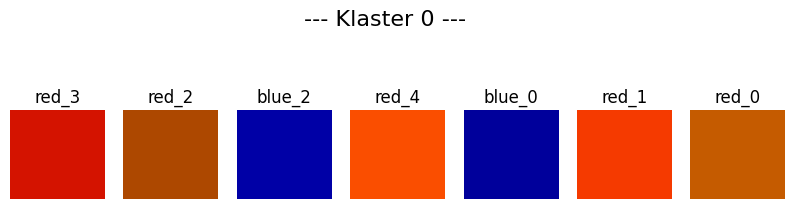

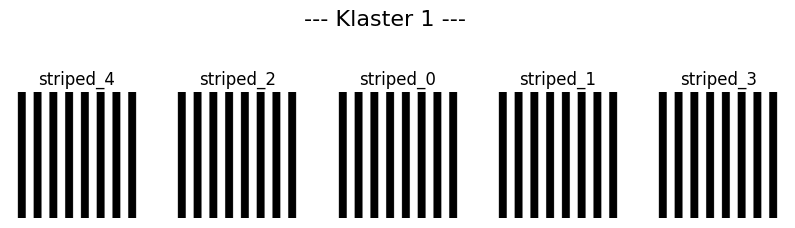

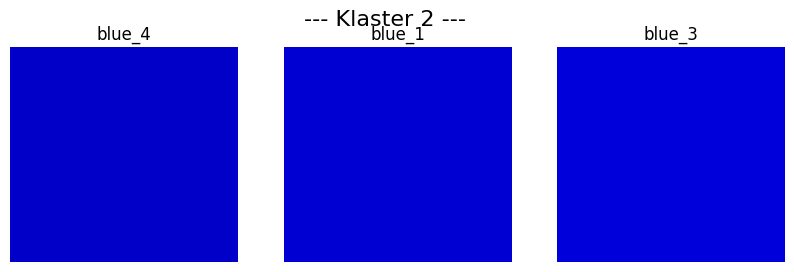

In [3]:
# --- KROK 0: Funkcja do ekstrakcji cech (tylko kolor) ---
def extract_color_features(image):
    """
    Konwertuje obraz do przestrzeni HSV i oblicza histogram kolorów.
    """
    if len(image.shape) < 3 or image.shape[2] == 1:
        image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv_image], [0, 1, 2], None, [8, 4, 4], [0, 180, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()

# --- KROK 1: Przygotowanie przykładowych danych (tak samo jak poprzednio) ---
if os.path.exists('test_images'):
    shutil.rmtree('test_images')
os.makedirs('test_images')

# Obrazy "czerwone"
for i in range(5):
    img = np.zeros((80, 85, 3), dtype=np.uint8)
    img[:, :, 2] = np.random.randint(150, 255)
    img[:, :, 1] = np.random.randint(0, 100)
    cv2.imwrite(f'test_images/red_{i}.png', img)

# Obrazy "niebieskie"
for i in range(5):
    img = np.zeros((80, 85, 3), dtype=np.uint8)
    img[:, :, 0] = np.random.randint(150, 255)
    cv2.imwrite(f'test_images/blue_{i}.png', img)

# Obrazy z teksturą (ich kolor to głównie czerń i biel)
for i in range(5):
    img = np.zeros((80, 85, 3), dtype=np.uint8)
    for col in range(0, 85, 10):
        img[:, col:col+5] = 255
    cv2.imwrite(f'test_images/striped_{i}.png', img)

print("Stworzono 15 przykładowych obrazów w folderze 'test_images'.")


# --- KROK 2: Zebranie wektorów cech dla wszystkich obrazów ---
image_dir = 'test_images'
all_features = []
image_paths = []

for filename in os.listdir(image_dir):
    path = os.path.join(image_dir, filename)
    image = cv2.imread(path)
    if image is not None:
        
        # ZMIANA TUTAJ: Używamy już tylko jednej funkcji
        # Nie ma potrzeby łączenia wektorów
        feature_vector = extract_color_features(image)
        
        all_features.append(feature_vector)
        image_paths.append(path)

# Konwersja listy wektorów na macierz NumPy
data = np.array(all_features)
print(f"Zebrano dane. Kształt macierzy cech: {data.shape}")

# --- KROK 3: Normalizacja danych (nadal bardzo ważna!) ---
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
print("Dane zostały znormalizowane.")

# --- KROK 4: Uruchomienie K-Means ---
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(scaled_data)
labels = kmeans.labels_
print(f"Wynikowe etykiety klastrów: {labels}")

# --- KROK 5: Wizualizacja wyników (bez zmian) ---
clusters = {i: [] for i in range(k)}
for path, label in zip(image_paths, labels):
    clusters[label].append(path)

for cluster_id, paths in clusters.items():
    fig, axes = plt.subplots(1, len(paths), figsize=(10, 3))
    fig.suptitle(f'--- Klaster {cluster_id} ---', fontsize=16)
    if len(paths) == 1: axes = [axes]
    for ax, path in zip(axes, paths):
        img = cv2.imread(path)
        ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax.axis('off')
        ax.set_title(os.path.basename(path).split('.')[0])
    plt.show()



In [ ]:
# Czyszczenie
shutil.rmtree('test_images')